# simple example with tree 

In [18]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [19]:
print(clf.predict([[0, 1]]))

[1]


In [37]:
from sklearn.datasets import load_iris
from os import system

In [36]:
system("brew install graphviz")

0

In [33]:
import graphviz

In [23]:
iris = load_iris()

In [24]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Build Decision Tree

In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [38]:
dot_data = tree.export_graphviz(clf, out_file = None, 
                                feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)

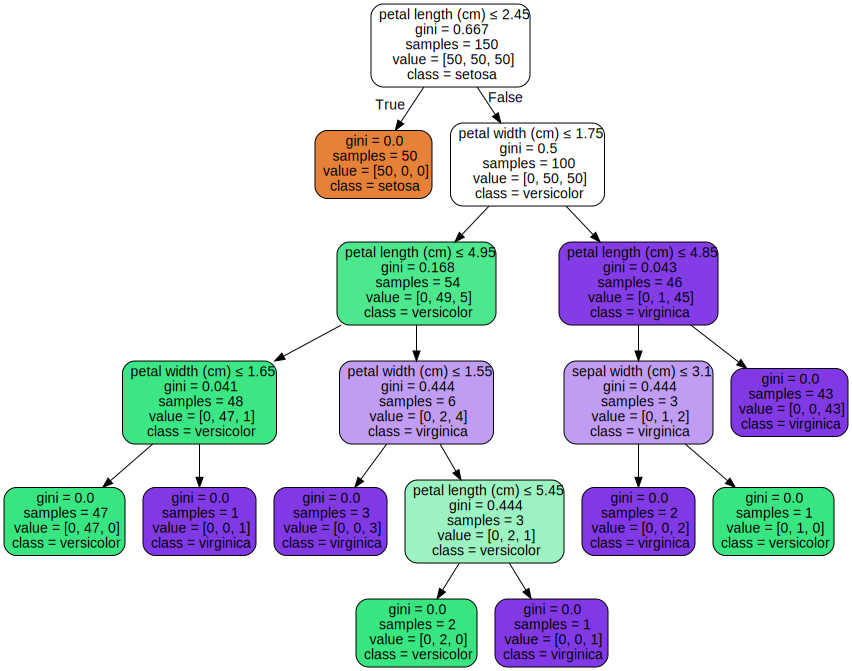

In [39]:
graph

In [40]:
#using entropy 
clf2=tree.DecisionTreeClassifier(criterion="entropy")
clf2.fit(iris.data,iris.target)

DecisionTreeClassifier(criterion='entropy')

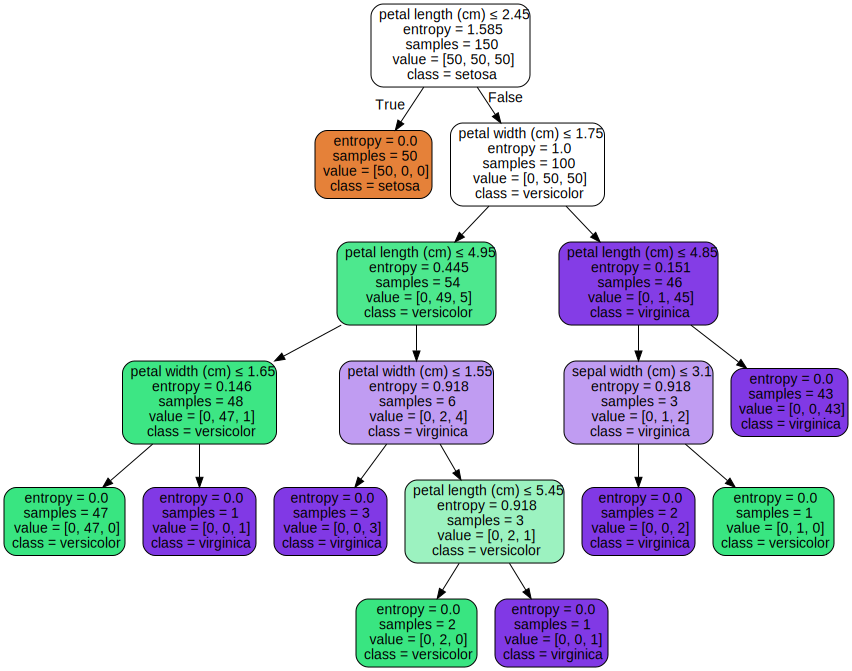

In [41]:
dot_data2=tree.export_graphviz(clf2,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph2=graphviz.Source(dot_data2)
graph2

**Pruning**
- a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.

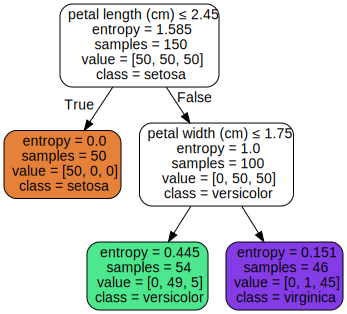

In [42]:
clf3=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf3.fit(iris.data,iris.target)
dot_data3=tree.export_graphviz(clf3,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph3=graphviz.Source(dot_data3)
graph3

In [43]:
#calculate confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [44]:
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [45]:
confusion_matrix(iris.target,clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

**split Training-test data**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, stratify=iris.target,random_state=1)
clf4=tree.DecisionTreeClassifier(criterion="entropy")
clf4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
confusion_matrix(y_test,clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

# Decision regression tree
- Decision trees where the target variable can take continuous values

In [50]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#generate dataset - sin function
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis = 0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [51]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]

In [54]:
# build two trees
regr1=tree.DecisionTreeRegressor(max_depth=2)
regr2=tree.DecisionTreeRegressor(max_depth=5)
regr1.fit(X,y)
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [55]:
#predict
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

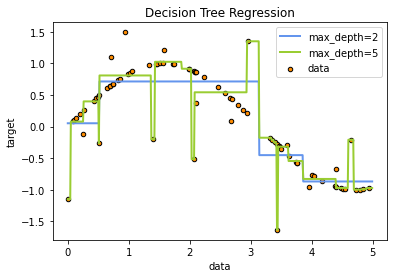

In [57]:
#visualization
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#can check that regr1 ignoring outliers and better capturing the overall trend
#for this example regr1 is more fitted

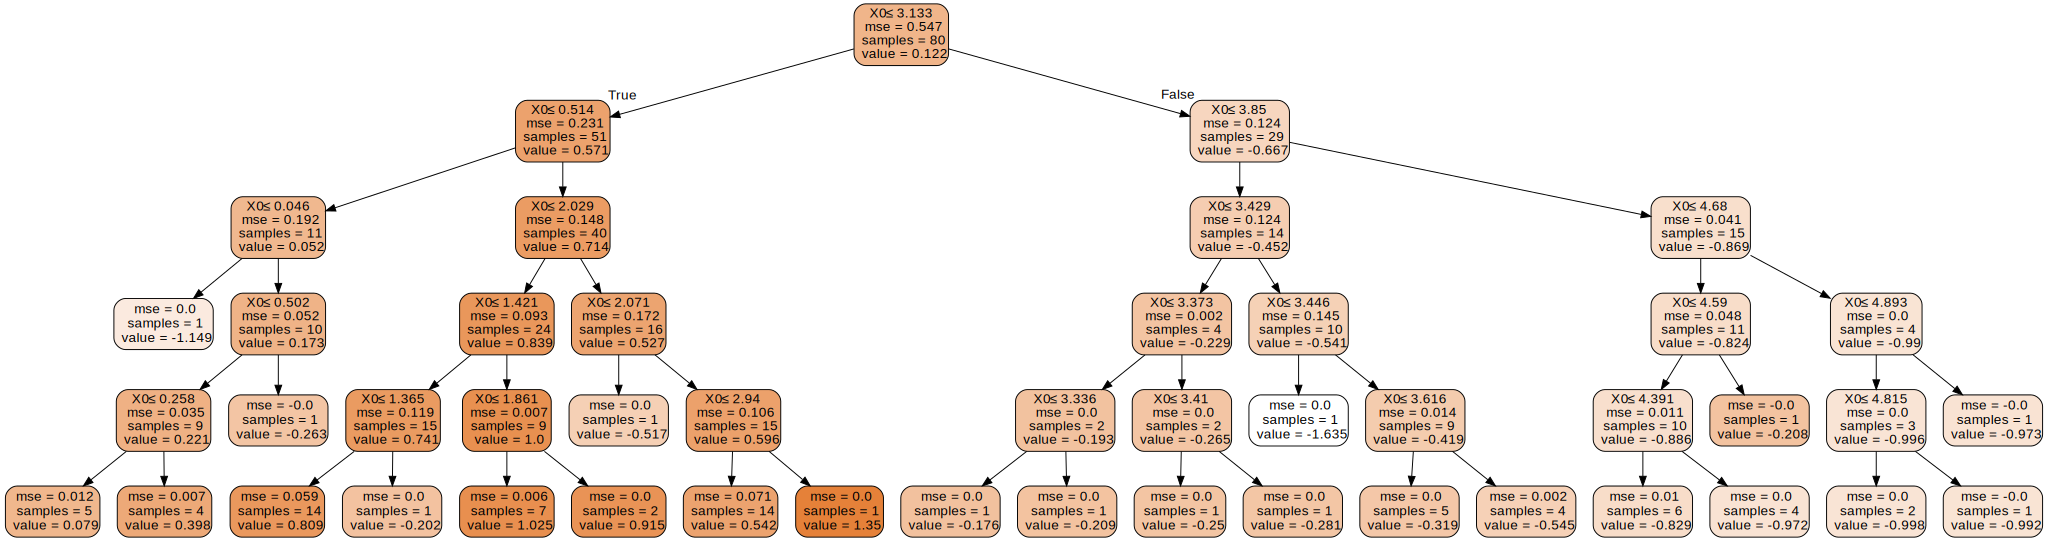

In [58]:
# visualize regr2
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)
graph4 = graphviz.Source(dot_data4) 
graph4

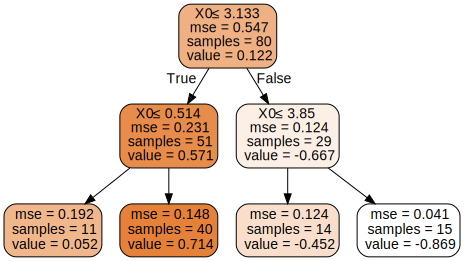

In [59]:
#visualize regr1 (depth=2)
dot_data5 = tree.export_graphviz(regr1, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)
graph5=graphviz.Source(dot_data5)
graph5